In [1]:
import sys
from pathlib import Path
sys.path.append('dataset_pericardium')
sys.path.append('models')

import os
from unet_plain import UNet
from dataset import PericardiumDataset
from loss import DiceLoss
from utils import dsc
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



In [ ]:
dataset = PericardiumDataset(
    os.path.join('dataset_pericardium_manual/', 'input'),
    os.path.join('dataset_pericardium_manual/', 'label'), 
    subset="single",
    image_size=128,
    random_sampling=False)

reading single images...


In [58]:
def worker_init(worker_id):
    np.random.seed(42 + worker_id)

loader = DataLoader(
        dataset,
        batch_size=16,
        drop_last=False,
        num_workers=0,
        worker_init_fn=worker_init,
    )

In [ ]:
import torch
image, mask = dataset[0]
image[0]

In [ ]:
x = image.unsqueeze(0)
x.shape
x[:, :1, :, :].shape

In [7]:
x[0, 1, 0, 0]

tensor(-0.4722)

In [ ]:
unet = UNet(in_channels=1, out_channels=1)
predicted = unet(image.unsqueeze(0))

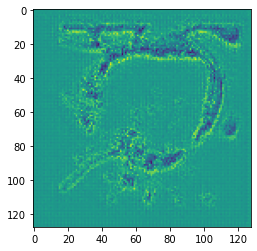

In [20]:
import matplotlib.pyplot as plt
plt.imshow(predicted.detach().numpy().squeeze())

In [21]:
loss = DiceLoss()
loss.forward(predicted, mask.unsqueeze(0))

tensor(0.6485, grad_fn=<RsubBackward1>)

In [45]:
loader_train, loader_valid = DataLoader(
        dataset_valid,
        batch_size=args.batch_size,
        drop_last=False,
        num_workers=args.workers,
        worker_init_fn=worker_init,
    )

34
41
38
34
48
46
46
40
37
42
39
39
40
42


In [48]:
from medpy.filter.binary import largest_connected_component

validation_pred = []
validation_true = []

def dsc(y_pred, y_true, lcc=True):
    if lcc and np.any(y_pred):
        y_pred = np.round(y_pred).astype(int)
        y_true = np.round(y_true).astype(int)
        y_pred = largest_connected_component(y_pred)
    
    return np.sum(y_pred[y_true == 1]) * 2.0 / (np.sum(y_pred) + np.sum(y_true))

dscs = []

for i in range(len(dataset)):
    image, mask = dataset[i]
    predicted = unet(image.unsqueeze(0))
    
    predicted_np = predicted.detach().cpu().numpy()
    validation_pred.extend([predicted_np[s] for s in range(predicted_np.shape[0])])
    
    mask_np = mask.unsqueeze(0).detach().cpu().numpy()
    validation_true.extend([mask_np[s] for s in range(mask_np.shape[0])])

In [50]:
dsc_list = []
num_slices = np.bincount([p[0] for p in dataset.patient_slice_index])
index = 0
for p in range(len(num_slices)):
    y_pred = np.array(validation_pred[index : index + num_slices[p]])
    y_true = np.array(validation_true[index : index + num_slices[p]])
    dsc_list.append(dsc(y_pred, y_true))
    index += num_slices[p]

In [51]:
dsc_list

[0.3195118598183222,
 0.3109290509174596,
 0.30995788462082025,
 0.29393050123724185,
 0.32019198556604866,
 0.31546729878354446]

In [1]:
!python train.py --images "dataset_pericardium/"

Traceback (most recent call last):
  File "train.py", line 17, in <module>
    from transform import transforms
ModuleNotFoundError: No module named 'transform'


In [59]:
train, valid = data_loaders()

NameError: name 'data_loaders' is not defined

In [2]:
import torch
model = UNet(in_channels=1, out_channels=1)
model.load_state_dict(torch.load('weights/unet.pt'))
model.eval()

UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [3]:
dataset = PericardiumDataset(
    os.path.join('dataset_pericardium/', 'input'),
    os.path.join('dataset_pericardium/', 'label'), 
    subset="single",
    image_size=128,
    random_sampling=False)

reading single images...
preprocessing single volumes...
resizing single volumes...
normalizing single volumes...
done creating single dataset


In [4]:
image, mask = dataset[0]
predicted = model(image.unsqueeze(0))
predicted.shape

torch.Size([1, 1, 128, 128])

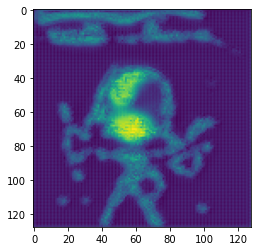

In [9]:
plt.imshow(predicted.squeeze().detach().numpy())

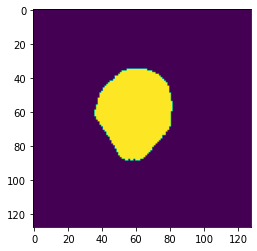

In [10]:
plt.imshow(mask.squeeze().detach().numpy())